In [23]:
import numpy as np
import pandas as pd

## Question1

In [2]:
cus = pd.read_csv("Customer.csv")
ph = pd.read_csv("prod_cat_info.csv")
cf = pd.read_csv("Transactions.csv")

In [114]:
cf

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


In [3]:
customer_final = pd.merge(cus,cf,left_on ="customer_Id",right_on="cust_id")

In [4]:
customer_final = pd.merge(customer_final,ph,left_on = ["prod_subcat_code","prod_cat_code"],right_on=["prod_sub_cat_code","prod_cat_code"])

In [5]:
customer_final.drop(columns=["customer_Id","prod_subcat_code"],inplace = True)

## Question2a

In [6]:
customer_final.dtypes

DOB                   object
Gender                object
city_code            float64
transaction_id         int64
cust_id                int64
tran_date             object
prod_cat_code          int64
Qty                    int64
Rate                   int64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object

In [26]:
customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])

<ipython-input-26-27925cc52690>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final["DOB"] = pd.to_datetime(customer_final["DOB"])
<ipython-input-26-27925cc52690>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  customer_final["tran_date"] = pd.to_datetime(customer_final["tran_date"])


## Question2b

In [27]:
customer_final.head(10)

,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,1970-02-01,M,4.0,87243835584,268408,2014-01-13,5,5,187,98.175,1033.175,TeleShop,Books,7,Fiction
1,1970-01-16,M,4.0,73109425404,275152,2011-03-25,5,2,464,97.440,1025.440,e-Shop,Books,7,Fiction
2,1970-01-18,F,4.0,64777271023,275034,2011-05-23,5,2,197,41.370,435.370,Flagship store,Books,7,Fiction
3,1970-01-22,F,8.0,87174343938,270829,2013-09-12,5,4,1141,479.220,5043.220,e-Shop,Books,7,Fiction
4,1970-01-29,F,7.0,76242744953,267657,2013-05-23,5,4,1020,428.400,4508.400,e-Shop,Books,7,Fiction
5,1970-01-02,M,4.0,78357345891,274630,2012-11-04,5,1,646,67.830,713.830,TeleShop,Books,7,Fiction
6,1970-01-02,M,4.0,23916816961,273541,2013-09-02,5,4,410,172.200,1812.200,e-Shop,Books,7,Fiction
7,1970-02-13,F,6.0,35560569829,269008,2013-09-03,5,1,1441,151.305,1592.305,e-Shop,Books,7,Fiction
8,1970-02-13,F,6.0,94033312891,269008,2012-04-26,5,5,746,391.650,4121.650,MBR,Books,7,Fiction
9,1970-02-14,NaN,2.0,56749259881,267199,2012-11-01,5,4,1049,440.580,4636.580,MBR,Books,7,Fiction


In [8]:
customer_final.tail(10)

,DOB,Gender,city_code,transaction_id,cust_id,tran_date,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
23043,15-11-1992,F,3.0,1407823655,268914,10/6/2011,5,1,1252,131.460,1383.460,MBR,Books,10,Non-Fiction
23044,17-11-1992,M,9.0,29719500605,269519,24-12-2013,5,4,1036,435.120,4579.120,TeleShop,Books,10,Non-Fiction
23045,25-11-1992,F,1.0,25762805863,273524,19-11-2012,5,1,1401,147.105,1548.105,Flagship store,Books,10,Non-Fiction
23046,02-12-1992,F,10.0,71337087467,272141,22-07-2012,5,-3,-1422,447.930,-4713.930,e-Shop,Books,10,Non-Fiction
23047,02-12-1992,F,10.0,71337087467,272141,16-07-2012,5,3,1422,447.930,4713.930,e-Shop,Books,10,Non-Fiction
23048,04-12-1992,F,1.0,63540378797,267812,10/10/2012,5,3,224,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,09-12-1992,F,7.0,71793203305,274618,17-08-2013,5,4,691,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,15-12-1992,F,7.0,91217108818,268097,1/2/2012,5,2,411,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,15-12-1992,F,7.0,90114483354,268097,31-01-2011,5,-4,-1408,591.360,-6223.360,e-Shop,Books,10,Non-Fiction
23052,15-12-1992,F,7.0,90114483354,268097,26-01-2011,5,4,1408,591.360,6223.360,e-Shop,Books,10,Non-Fiction


In [14]:
customer_final.shape

(23053, 15)

In [11]:
customer_final.nunique()

DOB                   3987
Gender                   2
city_code               10
transaction_id       20878
cust_id               5506
tran_date             1129
prod_cat_code            6
Qty                     10
Rate                  2551
Tax                   4194
total_amt             5764
Store_type               4
prod_cat                 6
prod_sub_cat_code       12
prod_subcat             18
dtype: int64

## Question2c

In [33]:
x = customer_final[["transaction_id","cust_id","Rate","Tax","total_amt","DOB","tran_date"]]
pd.DataFrame([x.min(),x.median(),x.max(),x.quantile(0.25),x.quantile(0.75)],index = ["min","median","max","Q1","Q3"])

<ipython-input-33-594a493af2ed>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  pd.DataFrame([x.min(),x.median(),x.max(),x.quantile(0.25),x.quantile(0.75)],index = ["min","median","max","Q1","Q3"])
<ipython-input-33-594a493af2ed>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  pd.DataFrame([x.min(),x.median(),x.max(),x.quantile(0.25),x.quantile(0.75)],index = ["min","median","max","Q1","Q3"])


,transaction_id,cust_id,Rate,Tax,total_amt,DOB,tran_date
min,3.268991e+06,266783.0,-1499.0,7.350,-8270.925,1970-01-02,2011-01-02
median,5.009313e+10,270980.0,710.0,199.080,1754.740,NaT,NaT
max,9.998755e+10,275265.0,1500.0,787.500,8287.500,1992-12-29,2014-12-02
Q1,2.493864e+10,268935.0,312.0,98.280,762.450,NaT,NaT
Q3,7.533000e+10,273114.0,1109.0,365.715,3569.150,NaT,NaT


## Question2d

In [41]:
y = customer_final.columns.difference(["transaction_id","cust_id","Rate","Tax","total_amt","DOB","tran_date"])
for col in y:
    print(customer_final[col].value_counts())

M    11811
F    11233
Name: Gender, dtype: int64
 5    4259
 1    4214
 3    4174
 2    4123
 4    4106
-4     458
-5     457
-2     438
-1     419
-3     405
Name: Qty, dtype: int64
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: city_code, dtype: int64
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64
5    6069
3    4898
6    4129
2    2999
1    2960
4    1998
Name: prod_cat_code, dtype: int64
4     4002
3     3067
10    2993
1     2950
11    2058
12    2029
7     1043
2     1007
6      989
9      985
8      972
5      958
Name: prod_sub_cat_code, dtype: int64
Women                  3048
Mens                   2912
Kids                   1997
Tools  

## Question3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E90F995F10>,
      dtype=object)

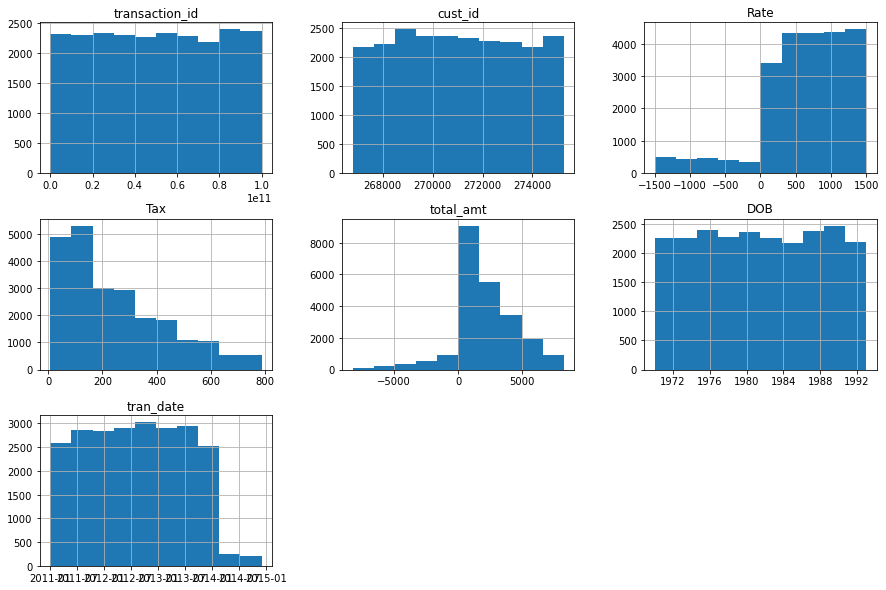

In [48]:
customer_final[["transaction_id","cust_id","Rate","Tax","total_amt","DOB","tran_date"]].hist(figsize=(15,10))

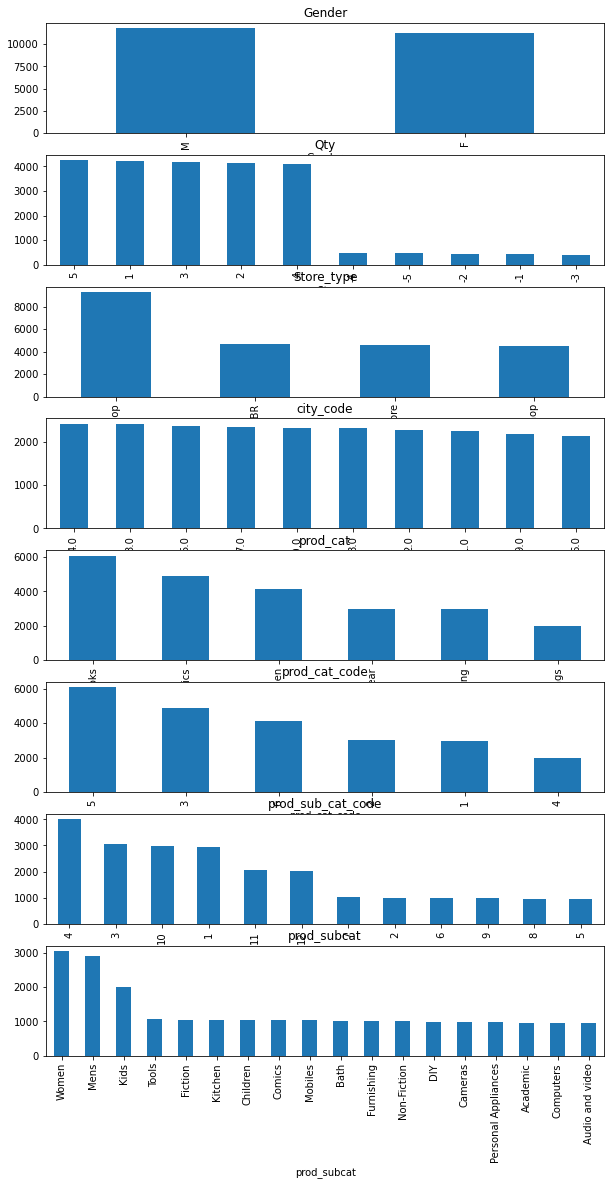

In [104]:
%matplotlib inline
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=len(y), ncols=1)
for col,i in zip(y,range(0,len(y))):
    customer_final[col].value_counts().plot.bar(ax=axes[i],figsize=(10,19),xlabel=col)
    axes[i].set_title(col)


## Question4a

In [108]:
sd = customer_final.tran_date.min()
ld = customer_final.tran_date.max()
print(str(sd) + ' to ' + str(ld))

2011-01-02 00:00:00 to 2014-12-02 00:00:00


## Question4b

In [113]:
customer_final[customer_final.total_amt<0].shape[0]

2177

## Question5

In [149]:
customer_final.groupby(["Gender","prod_cat"])["Qty"].sum()

Gender  prod_cat        
F       Bags                2362
        Books               7070
        Clothing            3425
        Electronics         5832
        Footwear            3716
        Home and kitchen    4895
M       Bags                2346
        Books               7587
        Clothing            3748
        Electronics         6476
        Footwear            3555
        Home and kitchen    5041
Name: Qty, dtype: int64

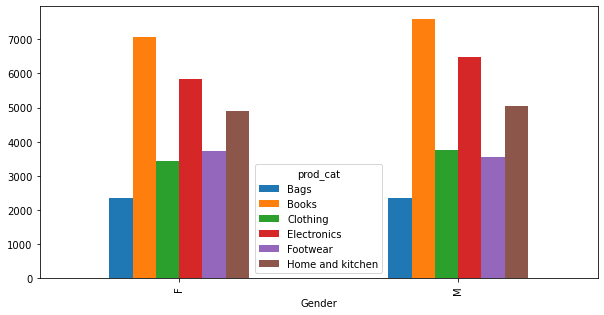

In [153]:
customer_final.groupby(["Gender","prod_cat"])["Qty"].sum().unstack().plot.bar(figsize = (10,5))

## Question6

In [180]:
x = customer_final[["city_code","cust_id"]].groupby(["city_code"]).nunique().sort_values("cust_id")

In [181]:
x["percentages"] = (x/x.sum())*100
x

,cust_id,percentages
city_code,,
6.0,516,9.375000
9.0,532,9.665698
1.0,535,9.720203
2.0,546,9.920058
10.0,546,9.920058
8.0,551,10.010901
7.0,563,10.228924
4.0,569,10.337936
5.0,570,10.356105


## Question7

In [190]:
customer_final[["Store_type","total_amt"]].groupby("Store_type").sum().astype(int).sort_values("total_amt",ascending = False)

,total_amt
Store_type,
e-Shop,19824816
Flagship store,9715688
MBR,9674486
TeleShop,9364781


In [191]:
customer_final[["Store_type","Qty"]].groupby("Store_type").sum().astype(int).sort_values("Qty",ascending = False)

,Qty
Store_type,
e-Shop,22763
MBR,11194
Flagship store,11133
TeleShop,10984


## Question8

In [199]:
customer_final[customer_final["Store_type"] == "Flagship store"].groupby("prod_cat")["total_amt"].sum()[["Electronics","Clothing"]]

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: total_amt, dtype: float64

## Question9

In [202]:
customer_final[customer_final["Gender"] == "M"].groupby("prod_cat")["total_amt"].sum()[["Electronics"]]

prod_cat
Electronics    5703109.425
Name: total_amt, dtype: float64

## Question10

In [213]:
temp = customer_final[customer_final["total_amt"]>0].groupby("cust_id")["transaction_id"].nunique()
temp[temp>10].count()

6

## Question11a

In [222]:
from datetime import date
dt = date.today()
customer_final["age"]=dt.year -customer_final["DOB"].dt.year
df1 = customer_final[(customer_final["age"] >25) & (customer_final["age"]<35)]
df2 = df1.groupby("prod_cat")["total_amt"].sum()[["Electronics","Books"]]

In [223]:
df2

prod_cat
Electronics    2272147.410
Books          2667784.925
Name: total_amt, dtype: float64

In [224]:
df2.sum()

4939932.335

## Question11b

In [229]:
df5 = customer_final[(customer_final["tran_date"] >  pd.to_datetime(" 1st Jan, 2014")) & (customer_final["tran_date"] < pd.to_datetime("1st Mar, 2014"))]

In [232]:
df5["total_amt"].sum()

1305716.62